In [2]:
#@title Load the Dataset
import tensorflow as tf

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [3]:
#@title Basic Information and Statistics
import numpy as np

# Basic information
num_train_samples = train_images.shape[0]
num_test_samples = test_images.shape[0]
image_shape = train_images.shape[1:]

print(f"Number of training samples: {num_train_samples}")
print(f"Number of testing samples: {num_test_samples}")
print(f"Image shape: {image_shape}")

# Summary statistics
train_images_flat = train_images.reshape(num_train_samples, -1)
test_images_flat = test_images.reshape(num_test_samples, -1)

print(f"Training images - Mean: {np.mean(train_images_flat)}, Std: {np.std(train_images_flat)}")
print(f"Testing images - Mean: {np.mean(test_images_flat)}, Std: {np.std(test_images_flat)}")


Number of training samples: 60000
Number of testing samples: 10000
Image shape: (28, 28)
Training images - Mean: 72.94035223214286, Std: 90.02118235130519
Testing images - Mean: 73.14656658163265, Std: 89.87325907809718


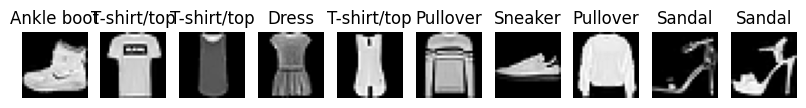

In [4]:
#@title Visualize Samples
import matplotlib.pyplot as plt

# Class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to plot sample images
def plot_sample_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 1))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]])
        plt.axis('off')
    plt.show()

plot_sample_images(train_images, train_labels)

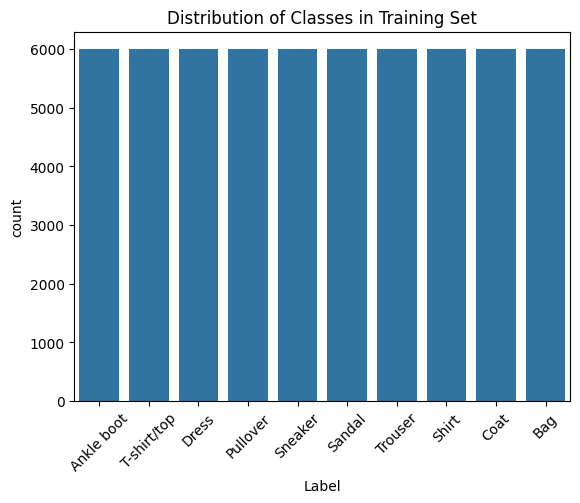

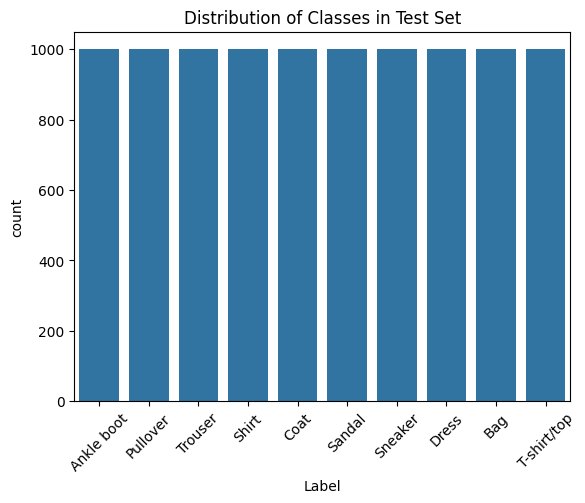

In [5]:
#@title Distribution of Classes
import seaborn as sns
import pandas as pd

# Distribution of classes in training set
train_labels_df = pd.DataFrame(train_labels, columns=['Label'])
train_labels_df['Label'] = train_labels_df['Label'].apply(lambda x: class_names[x])
sns.countplot(x='Label', data=train_labels_df)
plt.title("Distribution of Classes in Training Set")
plt.xticks(rotation=45)
plt.show()

# Distribution of classes in test set
test_labels_df = pd.DataFrame(test_labels, columns=['Label'])
test_labels_df['Label'] = test_labels_df['Label'].apply(lambda x: class_names[x])
sns.countplot(x='Label', data=test_labels_df)
plt.title("Distribution of Classes in Test Set")
plt.xticks(rotation=45)
plt.show()

c:\Users\phanh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\phanh\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


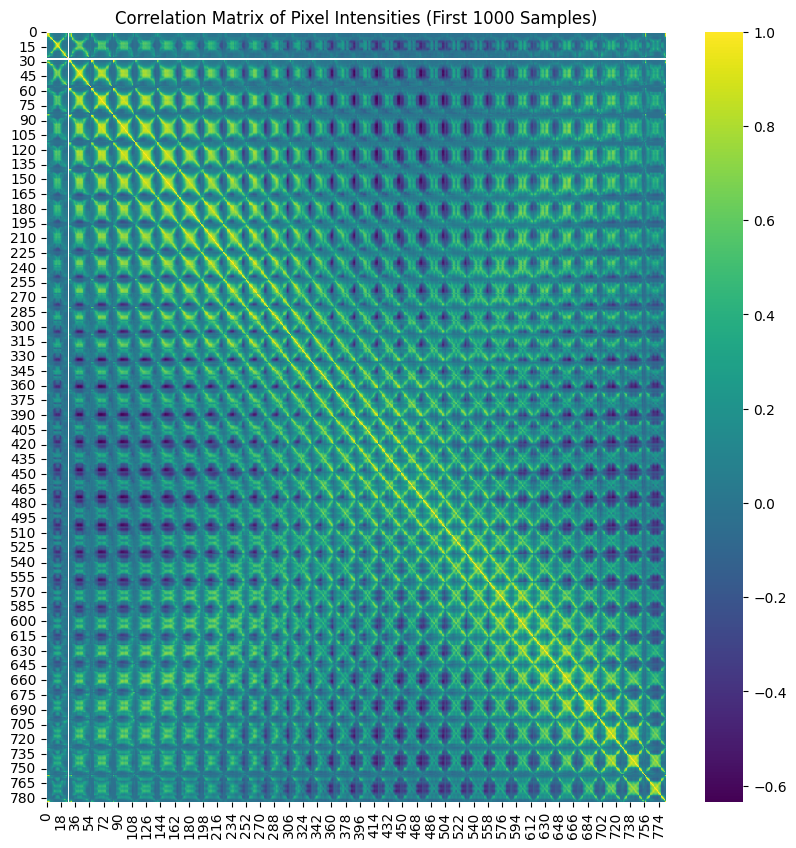

In [7]:
#@title Correlations
# Calculate the correlation matrix for the first 1000 training images
num_samples_for_corr = 1000
sample_images_flat = train_images[:num_samples_for_corr].reshape(num_samples_for_corr, -1)

correlation_matrix = np.corrcoef(sample_images_flat, rowvar=False)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title("Correlation Matrix of Pixel Intensities (First 1000 Samples)")
plt.show()

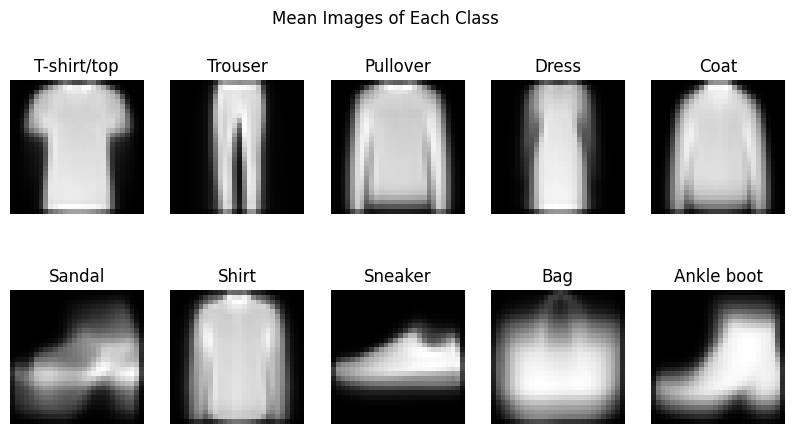

In [8]:
#@title Class-wise Mean Images
# Calculate and plot the mean image for each class
mean_images = []
for i in range(10):
    mean_image = np.mean(train_images[train_labels == i], axis=0)
    mean_images.append(mean_image)

# Plot the mean images
plt.figure(figsize=(10, 5))
for i, mean_image in enumerate(mean_images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(mean_image, cmap='gray')
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle("Mean Images of Each Class")
plt.show()


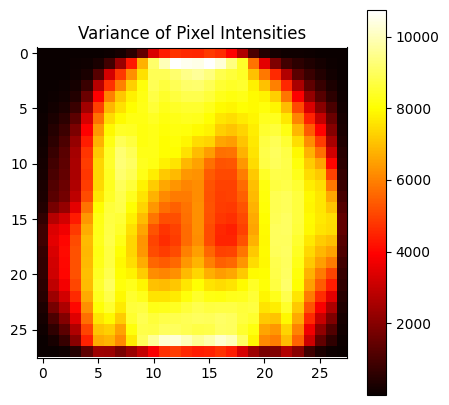

In [9]:
#@title Variance of Pixel Intensities
# Calculate the variance of pixel intensities for each pixel
pixel_variances = np.var(train_images, axis=0)

# Plot the variance of pixel intensities
plt.figure(figsize=(5, 5))
plt.imshow(pixel_variances, cmap='hot')
plt.title("Variance of Pixel Intensities")
plt.colorbar()
plt.show()

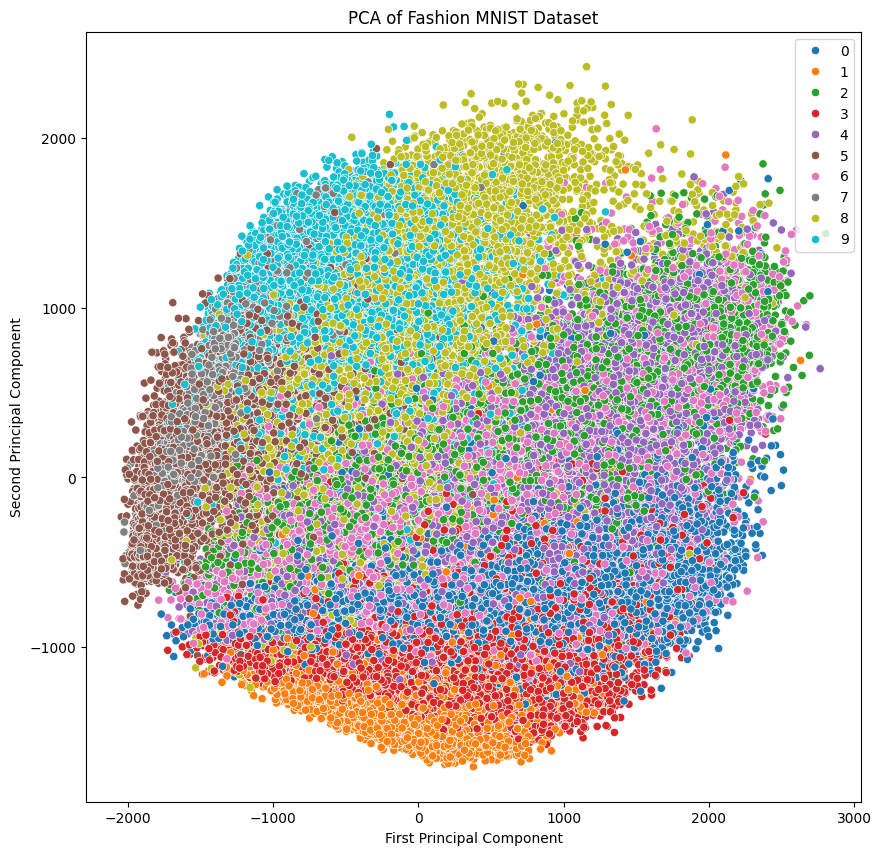

In [10]:
#@title Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
train_images_flat = train_images.reshape(num_train_samples, -1)
pca_result = pca.fit_transform(train_images_flat)

# Plot the first two principal components
plt.figure(figsize=(10, 10))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=train_labels, palette='tab10', legend='full')
plt.title("PCA of Fashion MNIST Dataset")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(loc='upper right')
plt.show()
